<a href="https://colab.research.google.com/github/DeepeshMadane/CODSOFT_ML/blob/main/bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

<h3>about dataset</h3>
<h5>Context</h5>
<p>It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.</p>

<h5>Content</h5>
<p>Various Bank detail is given like CustomerID , surname, Credit score and many more.</p>

<h5>Acknowledgements</h5>
<p>This dataset is originated from a U.S. bank .</p>
<h5>Inspiration</h5>
<p>Lets work together on this dataset and learn basic level of prediction using different libraries.</p>

In [2]:
# reading data
data =pd.read_csv('Churn_Modelling.csv')
#printing first 5 rows
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )


In [4]:
#exploring the columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [5]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<p>The dataset is very clear don't have any null values and there is some categorical features like(surname,Geography,Gender)</p>

In [6]:
#explore number of rows & features
print('number of rows = {}'.format(data.shape[0]))
print('number of cols or features  = {}'.format(data.shape[1]))

number of rows = 10000
number of cols or features  = 11


Text(0.5, 1.0, 'Comparsion betweeen Countries and Customers')

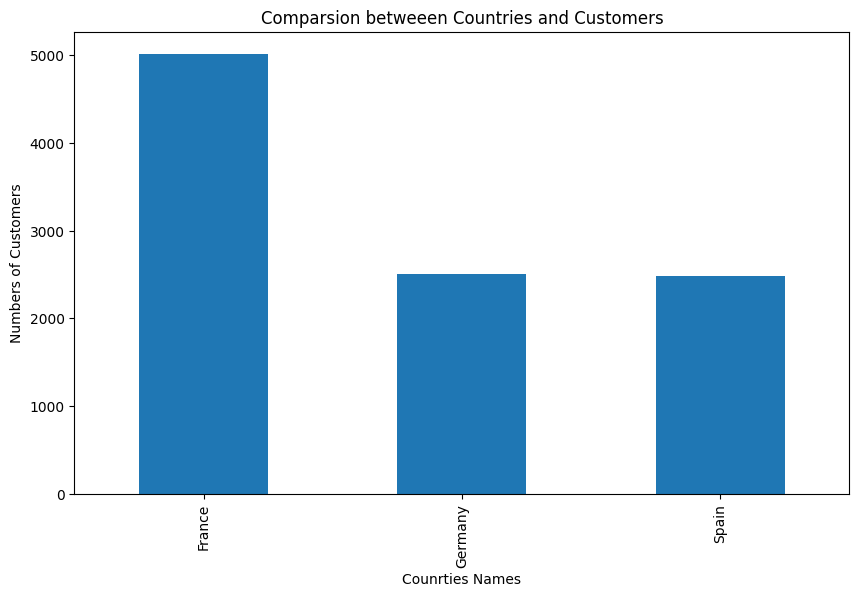

In [7]:
plt.figure(figsize=(10, 6))
data['Geography'].value_counts().plot(kind='bar')
plt.xlabel('Counrties Names')
plt.ylabel('Numbers of Customers')
plt.title("Comparsion betweeen Countries and Customers")

In [8]:
data= pd.get_dummies(data, columns= ['Geography', 'Gender'], drop_first=True)

In [9]:
X=data.drop(columns=['Exited'])
y=data['Exited']

Spiliting dataset int train and test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.25, random_state=3)


In [11]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
X_train.shape

(7500, 11)

<p>Build a model (ANN) in tensorflow/keras</p>

In [13]:
import tensorflow as tf
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Dense(6, activation='relu',input_dim=11),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
235/235 [==============================] - 1s 2ms/step - loss: 0.6352 - accuracy: 0.6513
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7975
Epoch 3/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7972
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4366 - accuracy: 0.7971
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.8008
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4270 - accuracy: 0.8112
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4239 - accuracy: 0.8149
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8205
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.4169 - accuracy: 0.8227
Epoch 10/100
235/235 [==============================] - 1s 2ms/step - loss: 0.4134 - accura

In [14]:
# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])



In [15]:
history = model.fit(X_train,y_train,batch_size=10,epochs=100,verbose=1,validation_split=0.25)

Epoch 1/100
563/563 [==============================] - 3s 4ms/step - loss: 0.3308 - accuracy: 0.8636 - val_loss: 0.3374 - val_accuracy: 0.8635
Epoch 2/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3309 - accuracy: 0.8622 - val_loss: 0.3368 - val_accuracy: 0.8587
Epoch 3/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3297 - accuracy: 0.8631 - val_loss: 0.3394 - val_accuracy: 0.8581
Epoch 4/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3302 - accuracy: 0.8636 - val_loss: 0.3413 - val_accuracy: 0.8619
Epoch 5/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3303 - accuracy: 0.8620 - val_loss: 0.3424 - val_accuracy: 0.8597
Epoch 6/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3296 - accuracy: 0.8658 - val_loss: 0.3461 - val_accuracy: 0.8576
Epoch 7/100
563/563 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8610 - val_loss: 0.3419 - val_accuracy: 0.8619

In [16]:
model.evaluate(X_test,y_test)

79/79 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8616


[0.3446153402328491, 0.8615999817848206]

In [17]:
# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 [==============================] - 0s 2ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [18]:
from sklearn.metrics import accuracy_score
test_acc=accuracy_score(y_test,y_pred)
print('accuracy on test data = {}'.format(test_acc))

accuracy on test data = 0.8616


In [19]:
train_pre=model.predict(X_train)
train_pre = (train_pre>0.5)
train_acc=accuracy_score(y_train,train_pre)
print('accuracy on test data = {}'.format(train_acc))

235/235 [==============================] - 1s 2ms/step
accuracy on test data = 0.8641333333333333


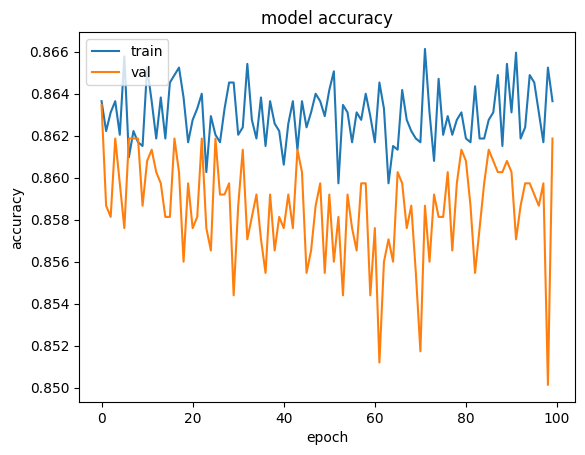

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

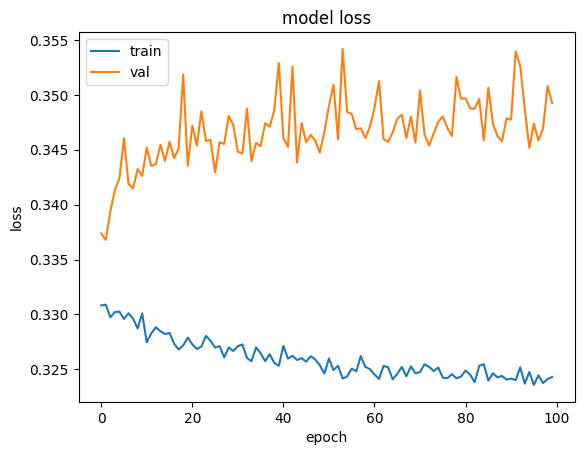

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

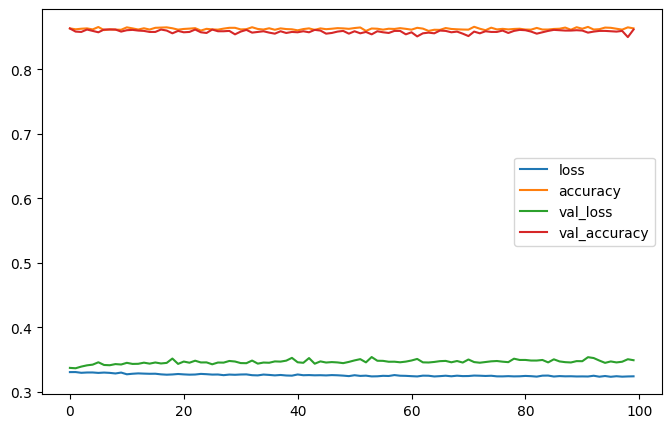

In [22]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.show()

In [23]:
# predicting the test set result
y_pred = model.predict(X_test)
y_pred = (y_pred>0.5)
y_pred

79/79 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

In [24]:
from sklearn.metrics import confusion_matrix
confusion_metric = confusion_matrix(y_test, y_pred)
confusion_metric

array([[1925,   57],
       [ 289,  229]])

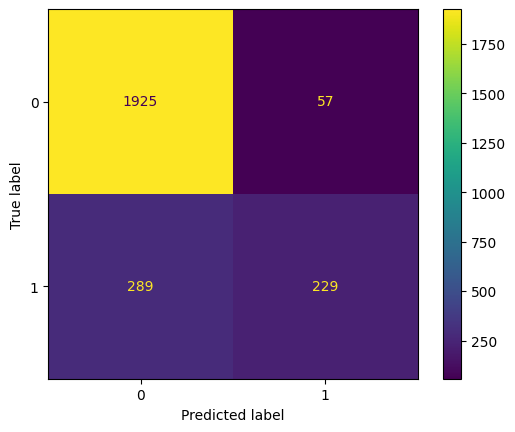

In [25]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_metric, display_labels=[0, 1])
cm_display.plot()

# Show the plot
plt.show()